In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

OPTIMIZATION


Minimize the function f(x)=(x-3)^2 i.e. find the minimum

In [4]:
from scipy.optimize import minimize 

In [6]:
def f(x):
    return (x-3)**2 #Easy 1D case

result = minimize(f, 2) #You need an initial guess, for instance x=2

In [7]:
result


      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])

In [11]:
print(result.x[0])
result.x

2.999999992549203


array([2.99999999])

OptimizeResult may have additional attributes not listed here depending on the specific solver being used. Since this class is essentially a subclass of dict with attribute accessors, one can see which attributes are available using the OptimizeResult.keys method.

Attributes:
xndarray
The solution of the optimization.

successbool
Whether or not the optimizer exited successfully.

statusint
Termination status of the optimizer. Its value depends on the underlying solver. Refer to message for details.

messagestr
Description of the cause of the termination.

fun, jac, hess: ndarray
Values of objective function, its Jacobian and its Hessian (if available). The Hessians may be approximations, see the documentation of the function in question.

hess_invobject
Inverse of the objective function’s Hessian; may be an approximation. Not available for all solvers. The type of this attribute may be either np.ndarray or scipy.sparse.linalg.LinearOperator.

nfev, njev, nhevint
Number of evaluations of the objective functions and of its Jacobian and Hessian.

nitint
Number of iterations performed by the optimizer.

maxcvfloat
The maximum constraint violation

Now a bit more difficult exercise with a 2D function (bidimensional parabola defined inside a group of plains arranged as a pentagonal prism).
Minimize the function f(x,y)=(x-1)^2 + (y-2,5)^2
subject to:
x-2y+2 >= 0
-x-2y+6 >= 0
-x+2y+2 >= 0
x >= 0
y >= 0

In [18]:
f = lambda x: (x[0]-1)**2 + (x[1]-2.5)**2
#Define now contraints as a tuple of dictionaries with
#the type of inequality as 1st element of dictionary and then as 2nd the function
cnstr = ({'type':'ineq', 'fun': lambda x: x[0]-2*x[1]+2},
          {'type':'ineq', 'fun': lambda x: -x[0]-2*x[1]+6},
          {'type':'ineq', 'fun': lambda x: -x[0]+2*x[1]+2})
#Axis bounds are easier to define
bnds = ((0,None), (0,None)) #Both x and y go from 0 to +infinity



In [19]:
results = minimize(f, (2,0), bounds=bnds, constraints=cnstr)

In [20]:
results.x

array([1.4, 1.7])

Note: use different techniques for different functions

INTERPOLATION
The easiest type of interpolation is linear, but it's not always the best choice

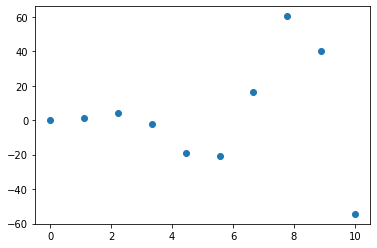

In [22]:
x = np.linspace(0,10,10)
y = x**2*np.sin(x)
plt.scatter(x,y)

In [23]:
from scipy.interpolate import interp1d

In [34]:
f = interp1d(x,y,kind='cubic') #try then with 'cubic'

In [45]:
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)

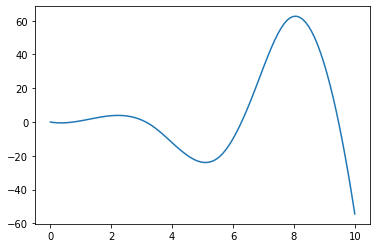

In [46]:
plt.plot(x_dense,y_dense)

CURVE FITTING
I know that some data have a quadratic relation, but I want to extract info for the parameters a and b of y = ax^2 + b.
It's different from interpolation: in the latter you want to get the values of the points in between.

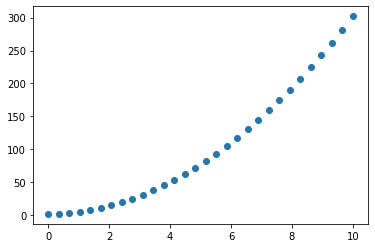

In [63]:
from scipy.optimize import curve_fit
x_data = np.linspace(0,10,30)
y_data = 3*x_data**2+2
plt.scatter(x_data,y_data)

In [64]:
def func(x,a,b):
    return a*x**2+b
#optimal parameters of a and b for the curve fit 
# (popt) and the covariance of the parameters
popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1)) #p0 initial guess
                                                    

In [65]:
popt #easy problem

array([3., 2.])

The equation of a spring motion is given by the following equation:
                        y(t) = A cos(ωt+Φ)
I want to find the the natural frequency of oscillations for the spring starting from the following data.

In [66]:
t_data = np.linspace(0,10,30)
y_data = np.array([4.3303953, 1.61137995, -2.15418696, -3.90137249, -1.67259042, 2.16884383, 3.86635998, 1.85194506, -1.8489224, -3.96560495, -2.13385255, 1.59425817, 4.06145238, 1.89300594, -1.76870297, -4.26791226, -2.46874133, 1.37019912, 4.24945607, 2.27038039, -1.50299303, -3.46774049, -2.50845488, 1.20022052, 3.81633703, 2.91511556, -1.24569189, -3.72716214, -2.54549857, 0.87262548])

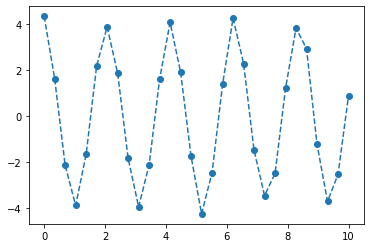

In [70]:
plt.plot(x_data,y_data, 'o--') #matplotlib acts basically like a linear interpolation

You know that ω=2πf, f=1/T and T, by the figure, is about 2 s, so ω is about π. The chart also suggests that the amplitude of oscillations is about 4 and the phase Φ is 0 

In [71]:
def func_spring(x, A, w, phi):
    return A*np.cos(w*x+phi)


In [99]:
popt, pcov = curve_fit(func_spring, t_data, y_data,p0=(4, np.pi, 0)) #try also with a bad initial guess

In [100]:
A, w, phi = popt

In [101]:
tt = np.linspace(0,10,100)
yy = func_spring(tt, A, w, phi)

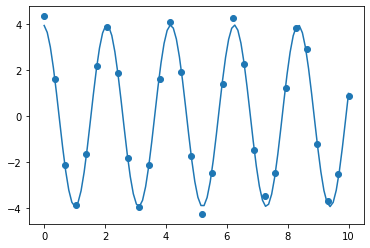

In [102]:
#scatter plot for my data
plt.scatter(t_data, y_data)
#2nd plot for the best fit curve
plt.plot(tt,yy)

In [103]:
np.diag(pcov) #variaces

array([2.61882696e-03, 1.85637396e-05, 6.63423920e-04])

In [104]:
pcov #covariance matrix

array([[ 2.61882696e-03, -4.94130717e-06,  3.47403958e-05],
       [-4.94130717e-06,  1.85637396e-05, -9.60755352e-05],
       [ 3.47403958e-05, -9.60755352e-05,  6.63423920e-04]])

In [105]:
np.sqrt(np.diag(pcov))#standard deviation

array([0.05117448, 0.00430857, 0.02575702])